# Gender classification part

## Data preparation
change working directory and read files

### Import modules, change dir and read data.

In [1]:
#import sys
#!{sys.executable} -m pip install simpleaudio

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import librosa
import librosa.display
import tqdm

#### Change working dir

In [42]:
os.chdir(r'D:\New folder')
df1 = pd.read_csv('data/csv/cv-valid-train.csv')
df1

filename  \
0       cv-valid-train/sample-000000.mp3   
1       cv-valid-train/sample-000001.mp3   
2       cv-valid-train/sample-000002.mp3   
3       cv-valid-train/sample-000003.mp3   
4       cv-valid-train/sample-000004.mp3   
...                                  ...   
195771  cv-valid-train/sample-195771.mp3   
195772  cv-valid-train/sample-195772.mp3   
195773  cv-valid-train/sample-195773.mp3   
195774  cv-valid-train/sample-195774.mp3   
195775  cv-valid-train/sample-195775.mp3   

                                                     text  up_votes  \
0       learn to recognize omens and follow them the o...         1   
1              everything in the universe evolved he said         1   
2       you came so that you could learn about your dr...         1   
3       so now i fear nothing because it was those ome...         1   
4       if you start your emails with greetings let me...         3   
...                                                   ...       ...   
195771                        the englishman said nothing         1   
195772                       the irish man sipped his tea         1   
195773                        what do you know about that         1   
195774                 the phone rang while she was awake         2   
195775  among these people were a couple of cyclists a...         4   

        down_votes       age gender   accent  duration  
0                0       NaN    NaN      NaN       NaN  
1                0       NaN    NaN      NaN       NaN  
2                0       NaN    NaN      NaN       NaN  
3                0       NaN    NaN      NaN       NaN  
4                2       NaN    NaN      NaN       NaN  
...            ...       ...    ...      ...       ...  
195771           0  thirties   male  england       NaN  
195772           0       NaN    NaN      NaN       NaN  
195773           0       NaN    NaN      NaN       NaN  
195774           0  twenties   male       us       NaN  
195775           1       NaN    NaN      NaN       NaN  

[195776 rows x 8 columns]

#### Read the 10 first rows

In [41]:
df1.head(10)

filename  \
0  cv-valid-train/sample-000000.mp3   
1  cv-valid-train/sample-000001.mp3   
2  cv-valid-train/sample-000002.mp3   
3  cv-valid-train/sample-000003.mp3   
4  cv-valid-train/sample-000004.mp3   
5  cv-valid-train/sample-000005.mp3   
6  cv-valid-train/sample-000006.mp3   
7  cv-valid-train/sample-000007.mp3   
8  cv-valid-train/sample-000008.mp3   
9  cv-valid-train/sample-000009.mp3   

                                                text  up_votes  down_votes  \
0  learn to recognize omens and follow them the o...         1           0   
1         everything in the universe evolved he said         1           0   
2  you came so that you could learn about your dr...         1           0   
3  so now i fear nothing because it was those ome...         1           0   
4  if you start your emails with greetings let me...         3           2   
5  a shepherd may like to travel but he should ne...         1           0   
6  night fell and an assortment of fighting men a...         3           0   
7             i heard a faint movement under my feet         2           1   
8                      put jackie right on the staff         3           0   
9  when he speaks in our language i can interpret...         1           0   

         age  gender accent  duration  
0        NaN     NaN    NaN       NaN  
1        NaN     NaN    NaN       NaN  
2        NaN     NaN    NaN       NaN  
3        NaN     NaN    NaN       NaN  
4        NaN     NaN    NaN       NaN  
5   twenties  female     us       NaN  
6        NaN     NaN    NaN       NaN  
7        NaN     NaN    NaN       NaN  
8  seventies    male     us       NaN  
9        NaN     NaN    NaN       NaN

#### Read the 5 last rows

In [164]:
df1.tail(5) 

filename  \
62416  cv-valid-train/wav/sample-195766.wav   
62417  cv-valid-train/wav/sample-195767.wav   
62418  cv-valid-train/wav/sample-195770.wav   
62419  cv-valid-train/wav/sample-195771.wav   
62420  cv-valid-train/wav/sample-195774.wav   

                                                    text  age  gender   accent  
62416  but before i go i want to tell you a little story    4       1  england  
62417  down below in the darkness were hundreds of pe...    3       0       us  
62418  he heard a muffled grating sound and saw the b...    2       1  england  
62419                        the englishman said nothing    3       1  england  
62420                 the phone rang while she was awake    2       1       us

## Data cleanup


In [4]:
print(len(df1))
df1.isnull().sum()

62421


filename    0
text        0
age         0
gender      0
accent      0
dtype: int64

#### Drop irrelevant columns and rows with null values

In [30]:
df = df1.drop(columns=['up_votes','down_votes','duration'])
df = df.drop(df[df.gender == "other"].index)
df = df.dropna(how='any',axis=0)
df.head(10)

filename  \
5   cv-valid-train/sample-000005.mp3   
8   cv-valid-train/sample-000008.mp3   
13  cv-valid-train/sample-000013.mp3   
14  cv-valid-train/sample-000014.mp3   
19  cv-valid-train/sample-000019.mp3   
20  cv-valid-train/sample-000020.mp3   
23  cv-valid-train/sample-000023.mp3   
26  cv-valid-train/sample-000026.mp3   
27  cv-valid-train/sample-000027.mp3   
29  cv-valid-train/sample-000029.mp3   

                                                 text        age  gender  \
5   a shepherd may like to travel but he should ne...   twenties  female   
8                       put jackie right on the staff  seventies    male   
13  but he had found a guide and didn't want to mi...   thirties  female   
14  as they began to decorate the hallway a silhou...    sixties    male   
19   then they got ahold of some dough and went goofy    fifties    male   
20  it was faintly marked with transverse stripes ...   thirties    male   
23    i had seen all that it would presently bring me   thirties    male   
26  two years ago right here on this spot i had a ...   twenties  female   
27  don't let them see that you're afraid the alch...   twenties    male   
29  the fire alarm went off again but when i looke...   thirties    male   

       accent  
5          us  
8          us  
13         us  
14    england  
19  australia  
20    england  
23         us  
26  australia  
27  australia  
29     indian

#### Transform data from String to int
Male = 1
Female = 0 \
Teen = 1, Twenties = 2, ... Eighties = 8

In [297]:
#df['gender'] = df['gender'].replace(['male'], 1)
#df['gender'] = df['gender'].replace(['female'], 0)
df1['age'] = df1['age'].replace([1], 1)
df1['age'] = df1['age'].replace([2], 2)
df1['age'] = df1['age'].replace([3], 2)
df1['age'] = df1['age'].replace([4], 2)
df1['age'] = df1['age'].replace([5], 2)
df1['age'] = df1['age'].replace([6], 3)
df1['age'] = df1['age'].replace([7], 3)
df1['age'] = df1['age'].replace([8], 3)
df1.head(10)

filename  \
0  cv-valid-train/wav/sample-000005.wav   
1  cv-valid-train/wav/sample-000008.wav   
2  cv-valid-train/wav/sample-000013.wav   
3  cv-valid-train/wav/sample-000014.wav   
4  cv-valid-train/wav/sample-000019.wav   
5  cv-valid-train/wav/sample-000020.wav   
6  cv-valid-train/wav/sample-000023.wav   
7  cv-valid-train/wav/sample-000026.wav   
8  cv-valid-train/wav/sample-000027.wav   
9  cv-valid-train/wav/sample-000029.wav   

                                                text  age  gender     accent  
0  a shepherd may like to travel but he should ne...    2       0         us  
1                      put jackie right on the staff    3       1         us  
2  but he had found a guide and didn't want to mi...    2       0         us  
3  as they began to decorate the hallway a silhou...    3       1    england  
4   then they got ahold of some dough and went goofy    2       1  australia  
5  it was faintly marked with transverse stripes ...    2       1    england  
6    i had seen all that it would presently bring me    2       1         us  
7  two years ago right here on this spot i had a ...    2       0  australia  
8  don't let them see that you're afraid the alch...    2       1  australia  
9  the fire alarm went off again but when i looke...    2       1     indian

### Save dataframe as new csv file

In [29]:
# df1.to_csv('accent-balanced-valid-train.csv', index=False)

### Remove uneeded accents

In [298]:
value_counts = df1['accent'].value_counts()
to_remove = value_counts[value_counts > 1148].index
df1 = df1[df1.accent.isin(to_remove)]


### Remove files with duration < 3 sec

In [23]:
for i, r in tqdm.tqdm(df1.iterrows(), "checking rows", total=len(df1)):
    signal, sr = librosa.core.load("cv-valid-train/"+str(r[0]), sr=22050)
    duration = librosa.get_duration(signal)
    if duration < 3:
        df1.drop(i, inplace=True)
print("done")

checking rows:   5%|▌         | 958/18410 [03:15<54:44,  5.31it/s]  C:\anaconda3\lib\site-packages\librosa\core\audio.py:162: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")
checking rows: 100%|██████████| 18410/18410 [57:01<00:00,  5.38it/s]  

done


### Balance dataset

In [26]:

g = df1.groupby('accent')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df1 = g
#df1 = df1.drop(df1[df1.accent.value_counts() < 1149].index)
#df1.drop(df1.loc[:1149].index[df1.accent == 'us'])
#df1.drop(df1.loc[0:28406].index, inplace=True)
#df1.drop(df1.loc[0])

In [310]:
g = df1.groupby('age')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
df1 = g

In [306]:
g = g.groupby('gender')
g = g.apply(lambda x: x.sample(g.size().min()).reset_index(drop=True))
g.tail(5)
df1 = g

## Data exploration
<!--  -->

### total files

In [314]:
df1.count()

filename    831
text        831
age         831
gender      831
accent      831
dtype: int64

### Plot accent

us                29555
england           14704
indian             4445
australia          4076
canada             3760
scotland           1480
newzealand         1153
african            1149
ireland             835
philippines         318
wales               262
bermuda             196
malaysia            182
singapore           124
hongkong             99
southatlandtic       83
Name: accent, dtype: int64

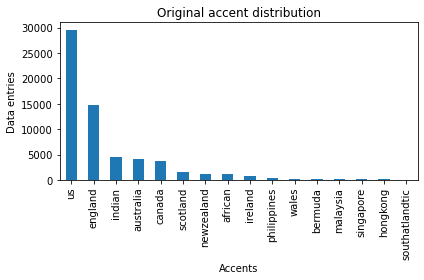

In [39]:
df1.accent.value_counts().plot(kind='bar')
plt.title('Original accent distribution')
plt.xlabel('Accents')
plt.ylabel('Data entries')
plt.tight_layout()
# plt.savefig('plots/unbalanced-original/unbalanced_accent.png')
df1.accent.value_counts()

### Plot gender

1    46002
0    16419
Name: gender, dtype: int64

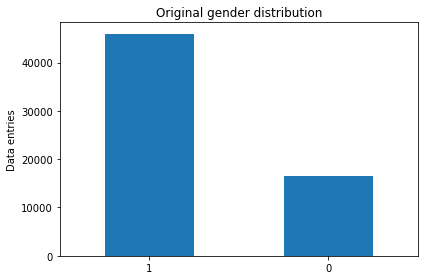

In [38]:
df1.gender.value_counts().plot(kind='bar')
plt.title('Original gender distribution')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Data entries')
plt.tight_layout()
plt.savefig('plots/unbalanced-original/Original_gender.png')
df1.gender.value_counts()

### Plot age

twenties     23003
thirties     18303
fourties     11100
fifties       9466
teens         5441
sixties       4584
seventies     1632
eighties       239
Name: age, dtype: int64

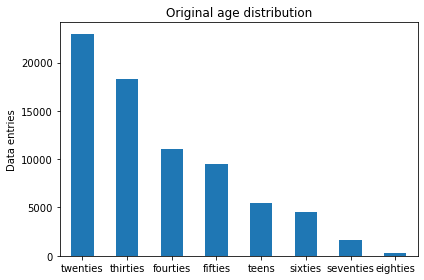

In [31]:
plot = df1.age.value_counts().plot(kind='bar')
plt.title('Original age distribution')
plt.xlabel('')
plt.xticks(rotation=0)
plt.ylabel('Data entries')
plt.tight_layout()
plt.savefig('plots/unbalanced-original/Original_age.png')
df1.age.value_counts()

In [113]:
#df.loc[(df['Salary_in_1000']>=100) & (df['Age']< 60) & (df['FT_Team'].str.startswith('S')),['Name','FT_Team']]

#test = df1.loc[(df1['age']<2) & (df1['gender']==0)]
#test.count()
#test = df1.loc[(df1['age']>=2) &(df1['age'] <=5) & (df1['gender']==0)]
#test.count()
test = df1.loc[(df1['age']>=6) & (df1['gender']==0)]
test.count()

filename    996
text        996
age         996
gender      996
accent      996
dtype: int64

In [22]:
# for i, r in tqdm.tqdm(dfE.iterrows(), "checking rows", total=len(dfE)):
#     df1 = df1.drop(df1[df1.filename == str(r[0])].index)
# print("done")

checking rows: 100%|██████████| 625/625 [00:02<00:00, 299.16it/s]

done
